## Purpose of this Notebook

The purpose of this notebook is to provide you with an example solution to the Guided Project for the Natural Language Processing for Deep Learning course. Since the choice of data preparation, preprocessing, and modelling strategy is up to you, your results may be slightly different. Use this solution as a guide on how you could structure your own approach.

## Loading the libraries and the Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("train.csv")
print(df.shape)
print(df.columns)

(7613, 5)
Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


In [ ]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [ ]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
print(df['keyword'].nunique()); print(df['location'].nunique()); print(df['text'].nunique()); print(df['id'].nunique());print(df['target'].nunique())

221
3341
7503
7613
2


## Data Exploration

In [ ]:
df = df.drop(['id','keyword', 'location'], axis=1)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB
None
                                                text  target
0  Our Deeds are the Reason of this #earthquake M...       1
1             Forest fire near La Ronge Sask. Canada       1
2  All residents asked to 'shelter in place' are ...       1
3  13,000 people receive #wildfires evacuation or...       1
4  Just got sent this photo from Ruby #Alaska as ...       1


In [ ]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
df['target'].value_counts(normalize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


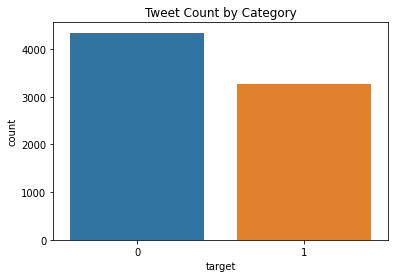

In [ ]:
sns.countplot('target', data = df)
plt.title('Tweet Count by Category')
plt.show()

We can see approximately 43% of the tweets were indicative of real disaster, and we can also see that the data is fairly balanced. We have also dropped some of the variables that might not carry predictive power. it's a text classification model we are dealing with, so the two variables of interest now are the `target` and the `text` variables.

### Text Preprocessing

In [ ]:
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [ ]:
# Lower Character all the Texts
df['text'] = df['text'].str.lower()
df['text'].head()

0    our deeds are the reason of this #earthquake m...
1               forest fire near la ronge sask. canada
2    all residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    just got sent this photo from ruby #alaska as ...
Name: text, dtype: object

In [ ]:
# Removing Punctuations and Numbers from the Text
def punctuations(inputs):
    return re.sub(r'[^a-zA-Z]', ' ', inputs)


df['text'] = df['text'].apply(punctuations)
df['text'].head()

0    our deeds are the reason of this  earthquake m...
1               forest fire near la ronge sask  canada
2    all residents asked to  shelter in place  are ...
3           people receive  wildfires evacuation or...
4    just got sent this photo from ruby  alaska as ...
Name: text, dtype: object

In [ ]:
def tokenization(inputs):
    return word_tokenize(inputs)


df['text_tokenized'] = df['text'].apply(tokenization)
df['text_tokenized'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text_tokenized, dtype: object

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')


def stopwords_remove(inputs):
    return [k for k in inputs if k not in stop_words]


df['text_stop'] = df['text_tokenized'].apply(stopwords_remove)
df['text_stop'].head()

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text_stop, dtype: object

In [ ]:
lemmatizer = WordNetLemmatizer()


def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]


df['text_lemmatized'] = df['text_stop'].apply(lemmatization)
df['text_lemmatized'].head()

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, ask, shelter, place, notify, offic...
3    [people, receive, wildfires, evacuation, order...
4    [get, send, photo, ruby, alaska, smoke, wildfi...
Name: text_lemmatized, dtype: object

In [ ]:
# Joining Tokens into Sentences
df['final'] = df['text_lemmatized'].str.join(' ')
df['final'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents ask shelter place notify officer eva...
3    people receive wildfires evacuation order cali...
4    get send photo ruby alaska smoke wildfires pou...
Name: final, dtype: object

In [ ]:
df.head()

,text,target,text_tokenized,text_stop,text_lemmatized,final
0,our deeds are the reason of this earthquake m...,1,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deeds, reason, earthquake, may, allah, forgiv...",deeds reason earthquake may allah forgive us
1,forest fire near la ronge sask canada,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,all residents asked to shelter in place are ...,1,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[residents, ask, shelter, place, notify, offic...",residents ask shelter place notify officer eva...
3,people receive wildfires evacuation or...,1,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order...",people receive wildfires evacuation order cali...
4,just got sent this photo from ruby alaska as ...,1,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[get, send, photo, ruby, alaska, smoke, wildfi...",get send photo ruby alaska smoke wildfires pou...


We can see the transformation of `text` column into `final` column post all the processing steps. This processed text is more suitable for building text classification models.

### WordCloud

In [ ]:
data_disaster = df[df['target'] == 1]
data_not_disaster = df[df['target'] == 0]

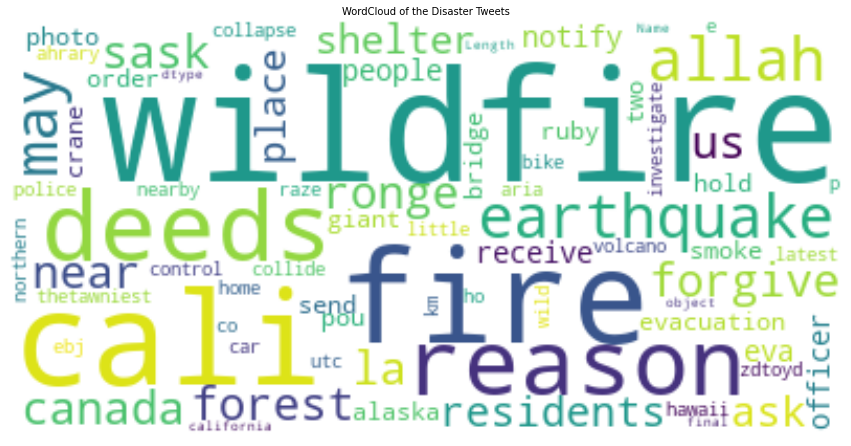

In [ ]:
from wordcloud import WordCloud

WordCloud_disaster = WordCloud(max_words=500,
                                  random_state=100,background_color='white',
                                  collocations=True).generate(str((data_disaster['final'])))

plt.figure(figsize=(15, 10))
plt.imshow(WordCloud_disaster, interpolation='bilinear')
plt.title('WordCloud of the Disaster Tweets', fontsize=10)
plt.axis("off")
plt.show()

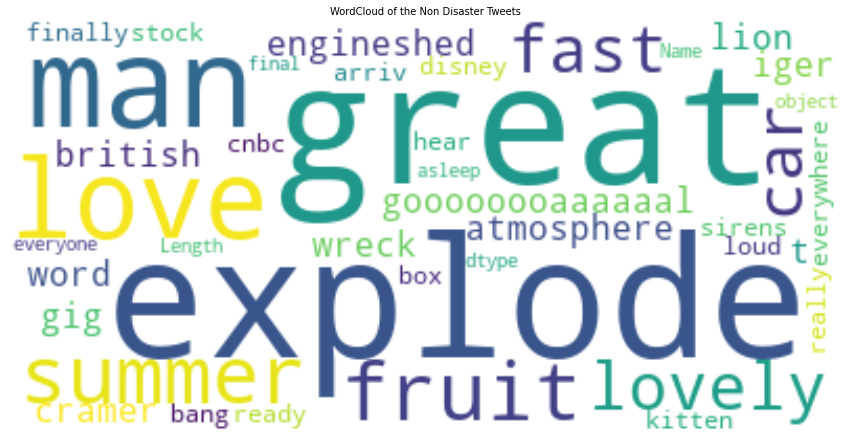

In [ ]:
WordCloud_not_disaster = WordCloud(max_words=500,
                                      random_state=100, background_color='white',
                                      collocations=True).generate(str((data_not_disaster['final'])))

plt.figure(figsize=(15, 10))
plt.imshow(WordCloud_not_disaster, interpolation='bilinear')
plt.title('WordCloud of the Non Disaster Tweets', fontsize=10)
plt.axis("off")
plt.show()

If we examine the wordcloud for disaster and non-disaster related tweets, we can see there are certain words that are more frequent in these respective tweets. This difference is sometimes useful in understanding the intricacies of the data and visually presenting it!

### Build a shallow neural network

In [ ]:
X = df['final']
y = df['target']

print(X.head())
print(y.head())

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents ask shelter place notify officer eva...
3    people receive wildfires evacuation order cali...
4    get send photo ruby alaska smoke wildfires pou...
Name: final, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (6090,) (6090,)
Testing set shape: (1523,) (1523,)


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import TextVectorization

In [ ]:
max_tokens = 7500
input_length = 128
output_dim = 128

In [ ]:
vectorizer_layer = tf.keras.layers.TextVectorization(max_tokens=max_tokens, output_mode='int', standardize='lower_and_strip_punctuation', output_sequence_length=input_length)
vectorizer_layer.adapt(X_train)

In [ ]:
#Creating and Embedding Layer:
from tensorflow.keras.layers import Embedding
embedding_layer = Embedding(input_dim=max_tokens,
                            output_dim=output_dim,
                            input_length=input_length)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(vectorizer_layer)
model.add(embedding_layer),
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

opt = tf.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, verbose=2)
model.evaluate(X_test, y_test)

Epoch 1/10
191/191 - 2s - loss: 0.6809 - accuracy: 0.5781
Epoch 2/10
191/191 - 1s - loss: 0.6761 - accuracy: 0.5831
Epoch 3/10
191/191 - 1s - loss: 0.6745 - accuracy: 0.5803
Epoch 4/10
191/191 - 1s - loss: 0.6726 - accuracy: 0.5835
Epoch 5/10
191/191 - 1s - loss: 0.6720 - accuracy: 0.5835
Epoch 6/10
191/191 - 1s - loss: 0.6722 - accuracy: 0.5837
Epoch 7/10
191/191 - 1s - loss: 0.6722 - accuracy: 0.5836
Epoch 8/10
191/191 - 1s - loss: 0.6723 - accuracy: 0.5837
Epoch 9/10
191/191 - 1s - loss: 0.6717 - accuracy: 0.5837
Epoch 10/10
191/191 - 1s - loss: 0.6723 - accuracy: 0.5837
48/48 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5836


[0.6860095858573914, 0.5835521817207336]

We divided the data in the 80:20 ratio, where we will use 80% of the data for training the model, while the other 20% of the data is used to test the model. You should feel free to use a different train-to-test ratio. With the model we built above, we achieved an accuracy of approximately 58% on both the training and the test set. The higher the accuracy value, the better the model is performing. We observe that this model did not achieved a great result. We'll observe the performance in the other models we'll build.

### Build a multi-layer deep text classification model

In [ ]:
from tensorflow.keras.regularizers import L1, L2, L1L2
model_regularized = tf.keras.models.Sequential()
model_regularized.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model_regularized.add(vectorizer_layer)
model_regularized.add(embedding_layer)
model_regularized.add(tf.keras.layers.GlobalAveragePooling1D())
model_regularized.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=L1(0.0005)))
model_regularized.add(tf.keras.layers.Dropout(0.6))
model_regularized.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=L1L2(0.0005)))
model_regularized.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=L2(0.0005)))
model_regularized.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=L2(0.0005)))
model_regularized.add(tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=L2(0.0005)))
model_regularized.add(tf.keras.layers.Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model_regularized.fit(X_train, y_train, epochs=10, verbose=2)
model_regularized.evaluate(X_test, y_test)

Epoch 1/10
191/191 - 2s - loss: 1.5841 - accuracy: 0.7456
Epoch 2/10
191/191 - 1s - loss: 1.2365 - accuracy: 0.8616
Epoch 3/10
191/191 - 1s - loss: 0.9600 - accuracy: 0.8865
Epoch 4/10
191/191 - 1s - loss: 0.8271 - accuracy: 0.9039
Epoch 5/10
191/191 - 1s - loss: 0.7303 - accuracy: 0.9066
Epoch 6/10
191/191 - 1s - loss: 0.6516 - accuracy: 0.9102
Epoch 7/10
191/191 - 1s - loss: 0.5904 - accuracy: 0.9136
Epoch 8/10
191/191 - 1s - loss: 0.5491 - accuracy: 0.9126
Epoch 9/10
191/191 - 1s - loss: 0.5188 - accuracy: 0.9141
Epoch 10/10
191/191 - 1s - loss: 0.4994 - accuracy: 0.9163
48/48 [==============================] - 0s 2ms/step - loss: 0.8062 - accuracy: 0.7958


[0.8062413930892944, 0.7957977652549744]

So we built the multi-layer deep text classification model with five additional dense layers as compared with the previous model. We also introduced regularization and a droput layer. It seemed to have a positive impact on the model performace as the accuracy improved for both training and test set. The accuracy was around 92% and 80% on the training and the test set, respectively. A significant increase from our previous model which is a great progress.

### Building a Multilayer Bidirectional LSTM Model

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
ml_bi_lstm = Sequential()
ml_bi_lstm.add(Input(shape=(1,), dtype=tf.string))
ml_bi_lstm.add(vectorizer_layer)
ml_bi_lstm.add(embedding_layer)
ml_bi_lstm.add(Bidirectional(LSTM(128, return_sequences=True)))
ml_bi_lstm.add(Bidirectional(LSTM(128, return_sequences=True)))
ml_bi_lstm.add(Bidirectional(LSTM(64)))
ml_bi_lstm.add(Dense(64, activation='elu', kernel_regularizer=L1L2(0.0001)))
ml_bi_lstm.add(Dense(32, activation='elu', kernel_regularizer=L2(0.0001)))
ml_bi_lstm.add(Dense(8, activation='elu', kernel_regularizer=L2(0.0005)))
ml_bi_lstm.add(Dense(8, activation='elu'))
ml_bi_lstm.add(Dense(4, activation='elu'))
ml_bi_lstm.add(Dense(1, activation='sigmoid'))
opt = RMSprop(learning_rate=0.0001, rho=0.8, momentum=0.9)
ml_bi_lstm.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
ml_bi_lstm.fit(X_train, y_train, epochs=10)
test_loss, test_acc = ml_bi_lstm.evaluate(X_test, y_test)
print(f"Test set accuracy: {test_acc}")

Epoch 1/10
191/191 [==============================] - 107s 515ms/step - loss: 0.2348 - accuracy: 0.9429
Epoch 2/10
191/191 [==============================] - 99s 520ms/step - loss: 0.1388 - accuracy: 0.9719
Epoch 3/10
191/191 [==============================] - 105s 552ms/step - loss: 0.1017 - accuracy: 0.9788
Epoch 4/10
191/191 [==============================] - 101s 530ms/step - loss: 0.0821 - accuracy: 0.9811
Epoch 5/10
191/191 [==============================] - 100s 521ms/step - loss: 0.0687 - accuracy: 0.9816
Epoch 6/10
191/191 [==============================] - 101s 528ms/step - loss: 0.0543 - accuracy: 0.9859
Epoch 7/10
191/191 [==============================] - 102s 532ms/step - loss: 0.0435 - accuracy: 0.9883
Epoch 9/10
191/191 [==============================] - 101s 528ms/step - loss: 0.0405 - accuracy: 0.9870
Epoch 10/10
48/48 [==============================] - 10s 167ms/step - loss: 1.8653 - accuracy: 0.7269
Test set accuracy: 0.7268549203872681


The Multilayer Bidirectional LSTM Model produced an accuracy of 99% on training data set and 73% on the test data set. There is clear improvement in training set accuracy, and even though the test set accuracy isn't bad by any standards, still the gap in train and test set accuracy seems to hint towrads overfitting!

### Building a Transformer Model

In [ ]:
!pip install datasets

In [ ]:
!pip install transformers

In [ ]:
import datasets
import transformers
import tensorflow_datasets as tfds
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
from transformers import TFAutoModelForSequenceClassification

In [ ]:
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased")

# Tokenize the text data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    tf.constant(y_train.values, dtype=tf.int32)
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    tf.constant(y_test.values, dtype=tf.int32)
))

train_dataset = train_dataset.batch(16)
test_dataset = test_dataset.batch(16)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5)

loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
model.fit(train_dataset, epochs=10, validation_data=train_dataset)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use i

Epoch 1/10
381/381 [==============================] - 991s 3s/step - loss: 0.4603 - accuracy: 0.7998 - val_loss: 0.3423 - val_accuracy: 0.8640
Epoch 2/10
381/381 [==============================] - 978s 3s/step - loss: 0.3340 - accuracy: 0.8680 - val_loss: 0.2257 - val_accuracy: 0.9246
Epoch 3/10
381/381 [==============================] - 977s 3s/step - loss: 0.2161 - accuracy: 0.9182 - val_loss: 0.1354 - val_accuracy: 0.9568
Epoch 4/10
381/381 [==============================] - 980s 3s/step - loss: 0.1518 - accuracy: 0.9404 - val_loss: 0.1353 - val_accuracy: 0.9629
Epoch 5/10
381/381 [==============================] - 980s 3s/step - loss: 0.1119 - accuracy: 0.9552 - val_loss: 0.1030 - val_accuracy: 0.9563
Epoch 6/10
381/381 [==============================] - 980s 3s/step - loss: 0.0905 - accuracy: 0.9642 - val_loss: 0.0527 - val_accuracy: 0.9793
Epoch 7/10
381/381 [==============================] - 980s 3s/step - loss: 0.0690 - accuracy: 0.9732 - val_loss: 0.0808 - val_accuracy: 0.9690

In the final model of this project, we relied on the heavy weight - the Transformer model. It sure didn't disappoint us with a brilliant train and test accuracy of 98% and 99% respectively. It's even more commendable because the the training and test set accuracies are close to each other, which shows that there is consistency!

### Conclusion

In this project, we built several deep learning text classification models using Tensorflow. We used a real-world tweets dataset to predict whether a tweet indicated disaster or not.

We started with a shallow neural network and went all the way to build Transformer based models. The performance of these various models is summarized below:

* Shallow Neural Network: Train and test set accuracy of around 58%

* Multi-layer deep text classification model: Train set accuracy of 92% and test set accuracy of 80%

* Multilayer Bidirectional LSTM Model: Train set accuracy of 99% and test set accuracy of 73%%

* Transformer Model: Train and test set accuracy of around 98%

We can see that the model performance is quite good for all the model variants, except the shallow neural network one. The best performance comes from the transformer model where both the traina nd test set accuracy is over 98%, and there is not much difference in their accuracies, indicating that the model is consistent across train and test sets, which is a good indication.

The approach in this guided solution is just one of the many ways to model this solution — please feel free to try out different combinations at your end to further improve model performance.